In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("9. Sales-Data-Analysis.csv")
df.head(10)

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin
5,10457,08-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris
6,10459,08-11-2022,Sides & Other,4.99,200.40,In-store,Credit Card,Walter Muller,Berlin
7,10460,09-11-2022,Burgers,12.99,554.27,In-store,Credit Card,Remy Monet,Paris
8,10461,09-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Remy Monet,Paris
9,10462,09-11-2022,Fries,3.49,573.07,In-store,Credit Card,Remy Monet,Paris


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        254 non-null    int64  
 1   Date            254 non-null    object 
 2   Product         254 non-null    object 
 3   Price           254 non-null    float64
 4   Quantity        254 non-null    float64
 5   Purchase Type   254 non-null    object 
 6   Payment Method  254 non-null    object 
 7   Manager         254 non-null    object 
 8   City            254 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 18.0+ KB


In [4]:
df.describe()

,Order ID,Price,Quantity
count,254.000000,254.000000,254.000000
mean,10584.133858,7.102323,460.611457
std,75.889181,4.341855,214.888699
min,10452.000000,2.950000,200.400000
25%,10520.250000,3.490000,201.010000
50%,10583.500000,4.990000,538.880000
75%,10649.750000,9.950000,677.440000
max,10713.000000,29.050000,754.430000


**#Revenue**

In [5]:
df["Revenue"]=df["Price"]*df["Quantity"]
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Revenue
0,10452,07-11-2022,Fries,3.49,573.07,Online,Gift Card,Tom Jackson,London,2000.0143
1,10453,07-11-2022,Beverages,2.95,745.76,Online,Gift Card,Pablo Perez,Madrid,2199.9920
2,10454,07-11-2022,Sides & Other,4.99,200.40,In-store,Gift Card,Joao Silva,Lisbon,999.9960
3,10455,08-11-2022,Burgers,12.99,569.67,In-store,Credit Card,Walter Muller,Berlin,7400.0133
4,10456,08-11-2022,Chicken Sandwiches,9.95,201.01,In-store,Credit Card,Walter Muller,Berlin,2000.0495
...,...,...,...,...,...,...,...,...,...,...
249,10709,28-12-2022,Sides & Other,4.99,200.40,Drive-thru,Gift Card,Walter Muller,Berlin,999.9960
250,10710,29-12-2022,Burgers,12.99,754.43,Drive-thru,Gift Card,Walter Muller,Berlin,9800.0457
251,10711,29-12-2022,Chicken Sandwiches,9.95,281.41,Drive-thru,Gift Card,Walter Muller,Berlin,2800.0295
252,10712,29-12-2022,Fries,3.49,630.37,Drive-thru,Gift Card,Walter Muller,Berlin,2199.9913


Most Preferred Payment Method

In [6]:
a=df.groupby("Payment Method")["Payment Method"].count()
a

Payment Method
Cash            76
Credit Card    120
Gift Card       58
Name: Payment Method, dtype: int64

In [7]:
a.idxmax()

' Credit Card'

**#Most sold product**

In [8]:

smQ=df.groupby("Product")["Quantity"].sum()
smQ

Product
Beverages             34983.14
Burgers               29022.31
Chicken Sandwiches    11135.92
Fries                 32034.34
Sides & Other          9819.60
Name: Quantity, dtype: float64

In [9]:
smQ.idxmax()

'Beverages'

**#Revenue generated by each products and the product with the most revenue**

In [10]:
smR=df.groupby("Product")["Revenue"].sum()
smR

Product
Beverages             103200.2630
Burgers               376999.8069
Chicken Sandwiches    114641.6950
Fries                 125674.2903
Sides & Other          48999.8040
Name: Revenue, dtype: float64

In [11]:
smR.idxmax()

'Burgers'

**#Revenues made by each city and the city with the highest revenue**

In [12]:
cityR=df.groupby(["City"])["Revenue"].sum()
cityR

City
Berlin    100600.1313
Lisbon    241714.1157
London    211201.0406
Madrid    136200.2665
Paris      79800.3051
Name: Revenue, dtype: float64

In [13]:
cityR.idxmax()

'Lisbon'

**#Revenue generated each day**

In [14]:
df["Date"]=pd.to_datetime(df["Date"],dayfirst=True)

In [15]:
DateR=df.groupby("Date")["Revenue"].sum()
DateR

Date
2022-11-07     5200.0023
2022-11-08    12400.0731
2022-11-09    14200.0386
2022-11-10    13200.0426
2022-11-11    14400.0156
2022-11-12    14000.0535
2022-11-13    27674.4512
2022-11-14    17839.3445
2022-11-15    13600.0305
2022-11-16    13600.0305
2022-11-17    14000.0535
2022-11-18    14400.1114
2022-11-19    14000.0194
2022-11-20     8200.0466
2022-11-21    14000.0838
2022-11-22    13599.9918
2022-11-23    13800.0378
2022-11-24    13600.0259
2022-11-25    13399.9799
2022-11-26    13200.0638
2022-11-27    13399.9799
2022-11-28    13400.0454
2022-11-29    13400.0454
2022-11-30    13600.0914
2022-12-01    13400.1144
2022-12-02    14000.0535
2022-12-03    14000.0535
2022-12-04     9000.1007
2022-12-05    14200.0386
2022-12-06    14000.1225
2022-12-07    14000.0535
2022-12-08    14200.0995
2022-12-09    14600.0616
2022-12-10    14600.0616
2022-12-11    15000.0881
2022-12-12    14600.0616
2022-12-13    14600.0616
2022-12-14    14600.0106
2022-12-15    14400.0945
2022-12-16    15000.

In [16]:
aveR=df["Revenue"].mean()
aveR

3029.589996850394

In [17]:
a=df.groupby(df["Date"].dt.month)["Revenue"].mean()
a

Date
11    2939.067773
12    3102.136176
Name: Revenue, dtype: float64

In [18]:
sdQ=df["Quantity"].std()
sdQ

214.88869921528863

In [19]:
sdR=df["Revenue"].std()
sdR

2420.11837804107

**#is Revenue increasing with time?**

In [20]:
a=df.groupby("Date")["Revenue"].sum()
len(a)

53

In [21]:
x=np.arange(1,54)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53])

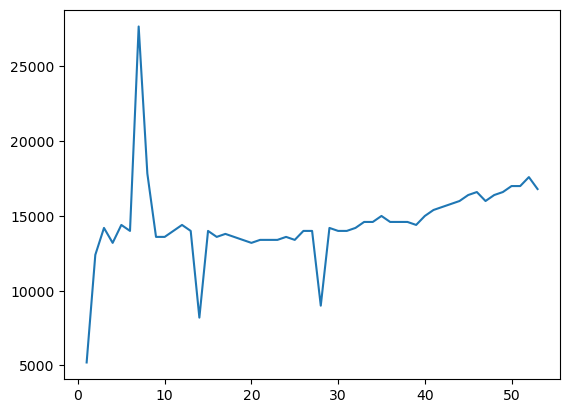

In [22]:
plt.plot(x,a)
plt.show()

**#descriptive statistics using mean**

In [23]:
df.groupby("Product").agg({
    "Revenue":"mean",
    "Quantity":"mean"
})

,Revenue,Quantity
Product,,
Beverages,2064.005260,699.662800
Burgers,7249.996287,558.121346
Chicken Sandwiches,2204.647981,214.152308
Fries,2464.201771,628.124314
Sides & Other,999.996000,200.400000


**#Frequency distribution of Purchase Type**

In [24]:
a=df.groupby("Purchase Type")["Purchase Type"].count()

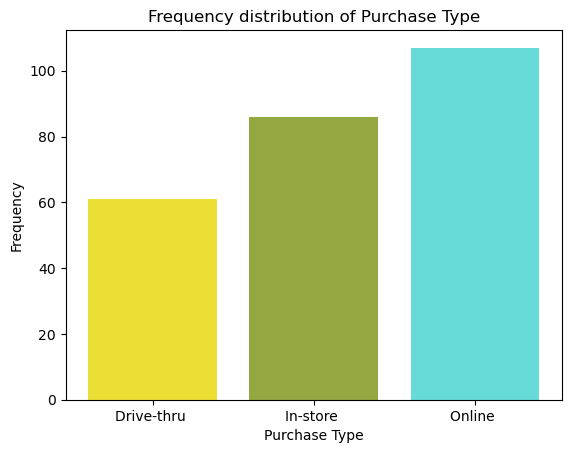

In [25]:
plt.bar(a.index,a,color=['#ebde34','#94a842','#67dbd7'])
plt.title("Frequency distribution of Purchase Type")
plt.xlabel("Purchase Type")
plt.ylabel("Frequency")
plt.show()